In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_excel('data_full_sekres.xlsx')

In [86]:
#Sort by sum of power from low to high
df.sort_values(by='sumEngMdoPower' , inplace=True)

#write new column with sum of consumptions
df['sumEngMdoConsumption']=df['engMdoConsumption_0_']+df['engMdoConsumption_1_']+df['engMdoConsumption_2_']+df['engMdoConsumption_3_']

#Copy dataframe
df_min_max_scaled = df.copy()

#Mash together equal rows of power and take average consumption
df_min_max_scaled = df_min_max_scaled.groupby('sumEngMdoPower').mean().reset_index()

#normalize power
df_min_max_scaled['sumEngMdoPower'] = (df_min_max_scaled['sumEngMdoPower'] - df_min_max_scaled['sumEngMdoPower'].min()) / (7500 - df_min_max_scaled['sumEngMdoPower'].min())

df_min_max_scaled = df_min_max_scaled.groupby('sumEngMdoPower').mean().reset_index()

In [83]:
display(df_min_max_scaled)

,sumEngMdoPower,Unnamed: 0,battery_0__actualPower,thrusterAndPropulsion,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,engMdoPower_0_,engMdoPower_1_,...,engMdoPerformance_0_,engMdoPerformance_1_,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_,sumEngMdoConsumption,sumMaxTheoreticPower,Efficiency
0,0.000000,290828.817056,-11.863397,0.00,250.00,261.863397,0.019282,5.914237,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000,0.296741,3.442353,0.021943,0.438017,4.199055,45.89567,0.000000
1,0.005333,219985.000000,71.000000,0.00,250.00,139.000000,2.000000,1.000000,0.0,13.333333,13.333333,...,608.383333,495.573333,0.0,500.620,51.283333,69.216667,0.000000,23.150000,143.650000,1570.09450,0.025476
2,0.006000,51129.000000,0.000000,0.00,250.00,205.000000,1.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,1333.060,0.000000,69.450000,0.000000,69.350000,138.800000,1517.08400,0.029662
3,0.006533,217383.000000,0.000000,0.00,250.00,201.000000,1.000000,1.000000,0.0,0.000000,49.000000,...,0.000000,1221.590000,0.0,0.000,0.000000,69.200000,0.000000,0.000000,69.200000,756.35600,0.064784
4,0.007333,217547.000000,11.000000,0.00,250.00,184.000000,2.000000,1.000000,0.0,55.000000,0.000000,...,1271.550000,0.000000,0.0,0.000,80.850000,69.450000,0.000000,0.000000,150.300000,1642.77900,0.033480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,0.568933,76174.000000,-8.000000,3551.57,707.43,0.000000,3.000000,100.000000,0.0,1558.000000,1435.000000,...,195.985000,222.037000,0.0,216.725,353.000000,368.350000,0.000000,319.200000,1040.550000,11373.21150,0.375180
3352,0.571867,76175.000000,2.000000,3480.12,810.88,0.000000,3.000000,100.000000,0.0,1465.000000,1435.000000,...,199.334000,202.145000,0.0,226.432,337.600000,335.350000,0.000000,363.600000,1036.550000,11329.49150,0.378570
3353,0.580533,139047.000000,28.000000,3380.69,1001.31,0.000000,3.000000,100.000000,0.0,1392.000000,1456.000000,...,214.728000,222.577000,0.0,148.187,345.550000,374.650000,0.000000,258.000000,978.200000,10691.72600,0.407231
3354,0.582667,76392.000000,39.000000,3223.92,1185.08,0.000000,3.000000,100.000000,0.0,1532.000000,1401.000000,...,180.764000,214.737000,0.0,207.913,320.150000,347.800000,0.000000,345.400000,1013.350000,11075.91550,0.394550


Text(0, 0.5, 'Consumption (liters/hour)')

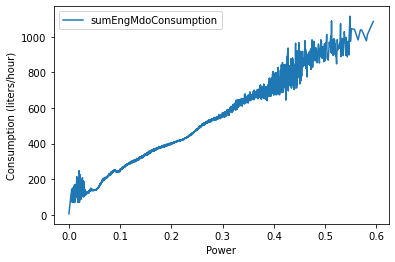

In [88]:
df_min_max_scaled.plot(x='sumEngMdoPower', y=['sumEngMdoConsumption'])
plt.xlabel('Power')
plt.ylabel('Consumption (liters/hour)')


## Repeat for each engine
Except 2 because it is not used

In [ ]:
df_min_max_scaled_0_ = df.copy()

df_min_max_scaled_0_['engMdoPower_0_'] = (df_min_max_scaled_0_['engMdoPower_0_'] - df_min_max_scaled_0_['engMdoPower_0_'].min()) / (2500 - df_min_max_scaled_0_['engMdoPower_0_'].min())

df_min_max_scaled_0_ = df_min_max_scaled_0_.groupby('engMdoPower_0_').mean().reset_index()

df_min_max_scaled_0_.plot(x='engMdoPower_0_', y=['engMdoConsumption_0_'])
plt.xlabel('Power')
plt.ylabel('Fuel Consumption (liters/hour)')

Text(0, 0.5, 'Fuel Consumption (liters/hour)')

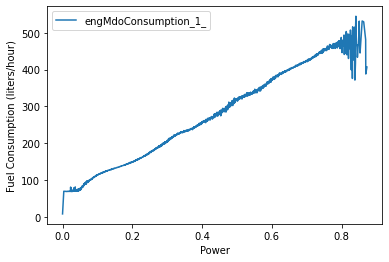

In [69]:
df_min_max_scaled_1_ = df.copy()

df_min_max_scaled_1_['engMdoPower_1_'] = (df_min_max_scaled_1_['engMdoPower_1_'] - df_min_max_scaled_1_['engMdoPower_1_'].min()) / (2500 - df_min_max_scaled_1_['engMdoPower_1_'].min())

df_min_max_scaled_1_ = df_min_max_scaled_1_.groupby('engMdoPower_1_').mean().reset_index()

df_min_max_scaled_1_.plot(x='engMdoPower_1_', y=['engMdoConsumption_1_'])
plt.xlabel('Power')
plt.ylabel('Fuel Consumption (liters/hour)')

Text(0, 0.5, 'Fuel Consumption (liters/hour)')

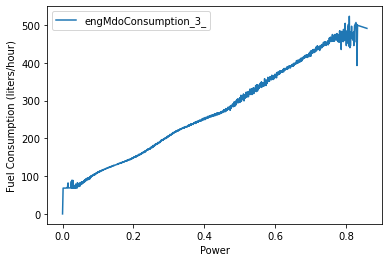

In [72]:
df_min_max_scaled_3_ = df.copy()

df_min_max_scaled_3_['engMdoPower_3_'] = (df_min_max_scaled_3_['engMdoPower_3_'] - df_min_max_scaled_3_['engMdoPower_3_'].min()) / (2500 - df_min_max_scaled_3_['engMdoPower_3_'].min())

df_min_max_scaled_3_ = df_min_max_scaled_3_.groupby('engMdoPower_3_').mean().reset_index()

df_min_max_scaled_3_.plot(x='engMdoPower_3_', y=['engMdoConsumption_3_'])
plt.xlabel('Power')
plt.ylabel('Fuel Consumption (liters/hour)')

# Efficiency calculations

Energy density of diesel is 10.93 kWh/l
Consumption multiplied by energy density is the theoretical output (l/h * kWh/l = kW)

Text(0, 0.5, 'Efficiency')

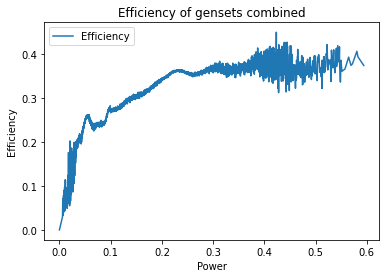

In [158]:
#Copy dataframe
df_eff = df.copy()

#Mash together equal rows of power and take average consumption
df_eff = df_eff.groupby('sumEngMdoPower').mean().reset_index()

#Multiplying consumption by 10.93 gives max theoretical output
df_eff['sumMaxTheoreticPower'] = df_eff['sumEngMdoConsumption']*10.93

#Efficiency is theoretic max divided by actual
df_eff["Efficiency"] = df_eff['sumEngMdoPower']/df_eff['sumMaxTheoreticPower']

#normalize power
df_eff['sumEngMdoPower'] = (df_eff['sumEngMdoPower'] - df_eff['sumEngMdoPower'].min()) / (7500 - df_eff['sumEngMdoPower'].min())

#plot
df_eff.plot(x='sumEngMdoPower', y=['Efficiency'], title='Efficiency of gensets combined')
plt.xlabel('Power')
plt.ylabel('Efficiency')



Polynomial regression line of efficiency

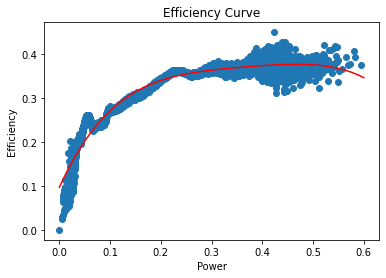

In [157]:
x = df_eff['sumEngMdoPower']
y = df_eff['Efficiency']

mymodel = np.poly1d(np.polyfit(x, y, 4))

myline = np.linspace(0, 0.6, 100)

plt.title('Efficiency Curve')
plt.xlabel('Power')
plt.ylabel('Efficiency')
plt.scatter(x, y)
plt.plot(myline, mymodel(myline),'r')
plt.show() 



Text(0, 0.5, 'Efficiency')

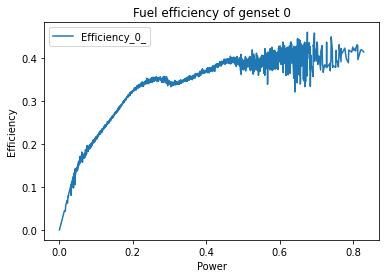

In [160]:
#Copy dataframe
df_eff_0_= df.copy()

#Mash together equal rows of power and take average consumption
df_eff_0_ = df_eff_0_.groupby('engMdoPower_0_').mean().reset_index()

#Multiplying consumption by 10.93 gives max theoretical output
df_eff_0_['MaxTheoreticPower_0_'] = df_eff_0_['engMdoConsumption_0_']*10.93

#Efficiency is theoretic max divided by actual
df_eff_0_["Efficiency_0_"] = df_eff_0_['engMdoPower_0_']/df_eff_0_['MaxTheoreticPower_0_']

#normalize power
df_eff_0_['engMdoPower_0_'] = (df_eff_0_['engMdoPower_0_'] - df_eff_0_['engMdoPower_0_'].min()) / (2500 - df_eff_0_['engMdoPower_0_'].min())

#plot
df_eff_0_.plot(x='engMdoPower_0_', y=['Efficiency_0_'], title = 'Fuel efficiency of genset 0')
plt.xlabel('Power')
plt.ylabel('Efficiency')